# Progetto finale del Master Start2Impact
### Scopo del progetto: Analizzare un dataset sulla qualità dell'acqua

## 1. Importazione delle librerie necessarie

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## 2. Caricamento del dataset

In [5]:
df = pd.read_csv('water_potability.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [6]:
df.shape

(3276, 10)

<div style="background-color: #fff8dc; padding: 10px;">
Il dataset contiene 3276 istanze (osservazioni) e 10 colonne (caratteristiche)
</div>

## 3. Esplorazione del dataset prima della suddivisione in training e test set

<span style="color: red; font-size: 18px; font-weight: bold;">
Esplorazione preliminare
</span>

In [10]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

<span style="color: red; font-size: 18px; font-weight: bold;">
Quali feature sono presenti?
</span>

In [12]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<span style="color: red; font-size: 18px; font-weight: bold;">
Ciascuna feature da che tipo di dati è rappresentata?
</span>

In [14]:
print(df.dtypes)

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


<div style="background-color: #fff8dc; padding: 10px;">

Il dataset fornito contiene delle **feature** (caratteristiche) e una **label** (etichetta), che possono essere descritti come segue:

#### 1. **Feature:**

Le prime 9 colonne rappresentano le **feature**. Queste variabili descrivono diverse proprietà o misurazioni dell'acqua e possono essere utilizzate per analisi o previsioni. Di seguito, una breve descrizione di ciascuna:

1. **ph (float64):**
   - Misura l'acidità o la basicità dell'acqua. Un pH inferiore a 7 è acido, superiore a 7 è basico, e 7 è neutro.
   - Statistiche: media di 7.08, deviazione standard di 1.59, con un minimo di 0 e un massimo di 14.

2. **Hardness (float64):**
   - Indica la durezza dell'acqua, che dipende dalla concentrazione di ioni di calcio e magnesio disciolti. L'acqua dura può causare incrostazioni nei tubi.
   - Statistiche: media di 196.37, deviazione standard di 32.88, con un minimo di 47.43.

3. **Solids (float64):**
   - Rappresenta la quantità totale di solidi disciolti nell'acqua, che può includere minerali, sali e metalli.
   - Statistiche: media di 22,014.09, deviazione standard di 8,768.57.

4. **Chloramines (float64):**
   - Indica il livello di clorammine, composti chimici derivati dalla reazione del cloro con l'ammoniaca, utilizzati come disinfettanti.
   - Statistiche: media di 7.12, deviazione standard di 1.58.

5. **Sulfate (float64):**
   - Indica la concentrazione di solfati nell'acqua, che può essere legata a contaminazioni o alta mineralizzazione.
   - Statistiche: media di 333.78, deviazione standard di 41.42, con un minimo di 129.

6. **Conductivity (float64):**
   - Misura la conducibilità elettrica dell'acqua, che dipende dalla quantità di sali disciolti.
   - Statistiche: media di 426.21, deviazione standard di 80.82.

7. **Organic_carbon (float64):**
   - Rappresenta la concentrazione di carbonio organico disciolto nell'acqua, derivante da materiale organico naturale o contaminante.
   - Statistiche: media di 14.28, deviazione standard di 3.31.

8. **Trihalomethanes (float64):**
   - I trihalometani sono composti chimici che si formano durante la disinfezione dell'acqua con cloro. Alcuni di questi sono contaminanti nocivi.
   - Statistiche: media di 66.40, deviazione standard di 16.18.

9. **Turbidity (float64):**
   - Misura la torbidità dell'acqua, che indica la presenza di particelle sospese come sedimenti, alghe o batteri.
   - Statistiche: media di 3.97, deviazione standard di 0.78.

#### 2. **Label:**

L'ultima colonna del dataset è **Potability**, che rappresenta la **label**:

- **Potability (int64):**
   - Indica se l'acqua è potabile o meno. Si tratta di una variabile binaria con valori che vanno da 0 a 1.
     - **0**: L'acqua non è potabile.
     - **1**: L'acqua è potabile.
   - Statistiche: la media di questa colonna è 0.39, il che significa che circa il 39% dei campioni è potabile, mentre il resto non lo è.

#### Sintesi:

- Le **feature** (ph, Hardness, Solids, Chloramines, ecc.) sono variabili quantitative che descrivono le caratteristiche chimiche e fisiche dell'acqua.
- La **label** (Potability) è una variabile categorica che indica se l'acqua è sicura per il consumo umano.


*Intanto possiamo fare una prima importante deduzione: dato che le etichette (labels) sono categoriche, l'obiettivo è assegnare a ciascun dato una categoria specifica. Questo indica che il problema è di **classificazione**, poiché la classificazione è il processo di suddividere i dati in categorie discrete sulla base di caratteristiche osservate. Le etichette categoriche, infatti, rappresentano classi, che l'algoritmo deve imparare a riconoscere e predire.*
</div>

## 4. Divisione Train e Test set

<span style="color: red; font-size: 18px; font-weight: bold;">
Il dataset è bilanciato?
</span>

In [18]:
print(df.Potability.value_counts())
print(df.Potability.value_counts()/df.Potability.count()*100)

Potability
0    1998
1    1278
Name: count, dtype: int64
Potability
0    60.989011
1    39.010989
Name: count, dtype: float64


<div style="background-color: #fff8dc; padding: 10px;">
    
Un dataset è considerato bilanciato se le classi della variabile target sono distribuite in modo uniforme.  
In questo caso sono più numerose le labels=0 che rappresentano circa il 61% di tutte le osservazioni, dunque **il df non è bilanciato**.
Se il dataset è sbilanciato, è buona prassi utilizzare **train_test_split** con il **parametro stratify** per suddividere i dati in modo che la distribuzione delle classi sia proporzionale sia nel training set che nel test set.

</div>

In [20]:
#Divido i dati in test set, val set e training set
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## 5. EDA

<span style="color: red; font-size: 18px; font-weight: bold;">
Ci sono valori mancanti?
</span>

In [23]:
print("\n=========Train set=======")
print(X_train.isnull().any())
print("\n=========Test set=======")
print(X_test.isnull().any())


=========Train set=======
ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
dtype: bool

=========Test set=======
ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
dtype: bool


In [24]:
print("\n=========Train set=======")
print(X_train.isnull().sum()/X_train.shape[0]*100)
print("\n=========Test set=======")
print(X_test.isnull().sum()/X_test.shape[0]*100)


=========Train set=======
ph                 14.896215
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            24.053724
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     5.087505
Turbidity           0.000000
dtype: float64

=========Test set=======
ph                 15.262515
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.199023
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.517705
Turbidity           0.000000
dtype: float64


In [25]:
#Controllo se i valori mancanti sono presenti per entrambe le classi
print('======Non potabile=====\n', df[df['Potability'] == 0].isnull().sum()/df.shape[0]*100)
print('\n=======Potabile========\n', df[df['Potability'] == 1].isnull().sum()/df.shape[0]*100)

======Non potabile=====
 ph                  9.584860
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            14.896215
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     3.266178
Turbidity           0.000000
Potability          0.000000
dtype: float64

=======Potabile========
 ph                 5.402930
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            8.943834
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    1.678877
Turbidity          0.000000
Potability         0.000000
dtype: float64


<div style="background-color: #fff8dc; padding: 10px;">
    Le colonne <strong><em>senza valori mancanti</em></strong> sono: Hardness, Solids, Chloramines, Conductivity, Organic_carbon, Turbidity, Potability(labels).<br>  
    Queste caratteristiche sono complete e non necessitano di interventi specifici per i valori mancanti.<br><br>
    Le colonne <strong><em>con valori mancanti</em></strong> sono:<br>  
    1. <strong><em>ph</strong></em> : La quantità di valori mancanti è moderata, quindi potrebbe essere necessario utilizzare tecniche di imputazione o rimozione dei record.<br>  
    2. <strong><em>Sulfate</strong></em> : Ha una percentuale elevata di valori mancanti, il che potrebbe rendere l'imputazione complessa. Potrebbe essere necessario esplorare diverse opzioni, come l'imputazione con il valore medio, la rimozione dei record o l'uso di modelli più avanzati.<br>  
    3. <strong><em>Trihalomethanes</strong></em> : La percentuale è relativamente bassa, quindi si potrebbe considerare l'imputazione, se necessario.<br><br>
    Osserviamo che la % di valori tra trai e test set è molto simile.<br><br>
        Osservando la suddivisione dei dati tra campioni "non potabili" (Potability = 0) e "potabili" (Potability = 1), notiamo che i valori mancanti sono più frequenti nei campioni non potabili, in particolare per le variabili 'ph' e 'Sulfate'<br><br>
    <strong>Conclusioni e suggerimenti:</strong><br>
    Se le colonne con valori mancanti (specialmente Sulfate e ph) sono importanti per il modello, si potrebbe considerare l'uso di tecniche di imputazione.<br>
    In alternativa, se i dati mancanti sono distribuiti casualmente e non influenzano fortemente i risultati, potrebbe essere appropriato rimuovere i record con valori mancanti.<br><br>
        <strong><em>Rimuovere o imputare i dati mancanti?</strong></em><br>
-Se i dati mancanti sono <strong><em>MCAR</strong></em> (Missing Completely at Random), puoi rimuovere le righe contenenti i valori mancanti o imputarli con la media/mediana.<br>
-Se i dati sono <strong><em>MAR</strong></em> o <strong><em>NMAR</strong></em> (Missing at Random o Not Missing at Random), è preferibile imputare i valori mancanti.<br>
</div>


<Axes: >

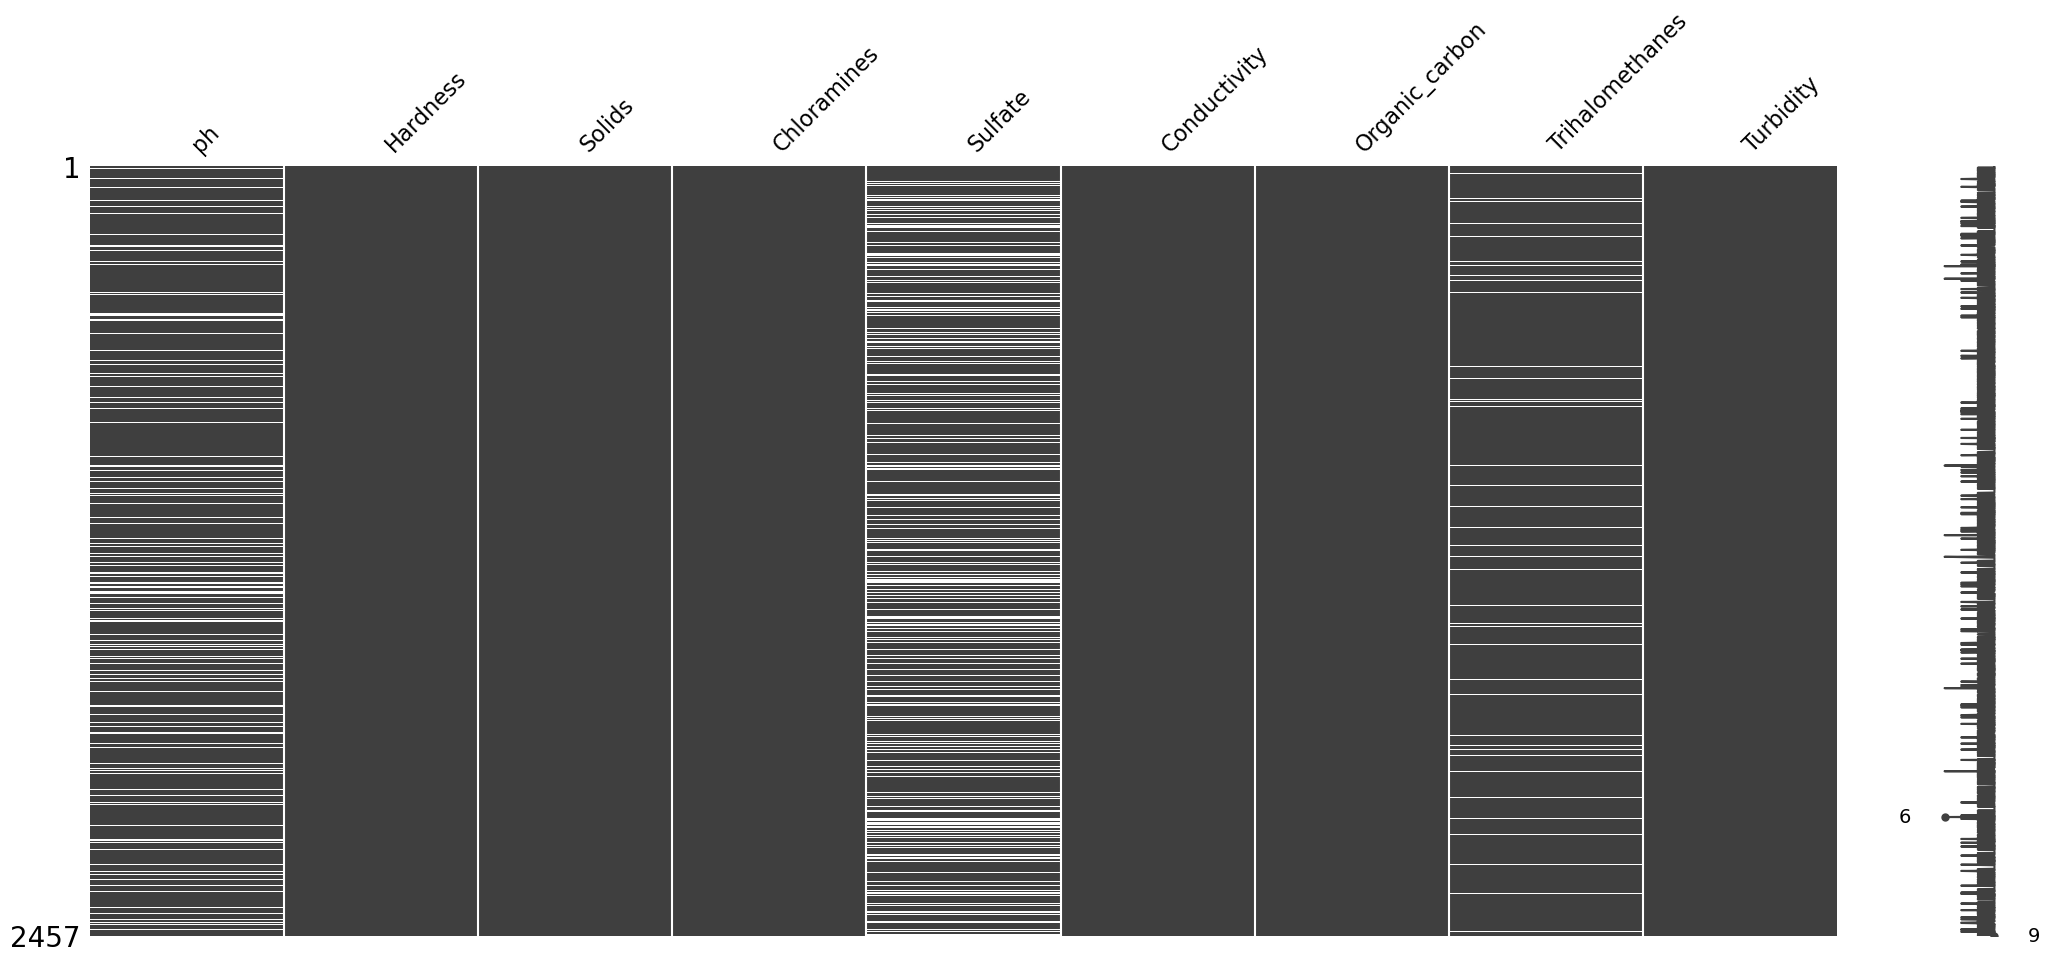

In [27]:
#!pip install missingno
import missingno as msno

# Visualizza la matrice di assenza per verificare se c'è un pattern
msno.matrix(X_train)

<span style="color: red; font-size: 18px; font-weight: bold;">
Come si distribuiscono i valori di ciascuna feature?
</span>

In [29]:
# Creo la figura con 3 righe e 3 colonne (3x3)
fig = make_subplots(
    rows=3, cols=3, 
    subplot_titles=X_train.columns,  # Escludo 'Potability' per l'istogramma
    shared_yaxes=False  # Non condividere gli assi Y tra i grafici
)

# Aggiungo un istogramma per ogni colonna (eccetto 'Potability')
for i, feature in enumerate(X_train.columns):
    # Calcola la posizione di riga e colonna nella griglia
    row = i // 3 + 1  # Righe (ogni 3 grafici si va a capo)
    col = i % 3 + 1  # Colonne (si riparte a 1 dopo ogni 3)

    # Creo l'istogramma per la feature
    fig.add_trace(
        go.Histogram(x=X_train[feature], nbinsx=30, histnorm='density', opacity=0.6),
        row=row, col=col
    )

    # Aggiungo i titoli agli assi dell'istogramma
    fig.update_xaxes(title_text="Valore", row=row, col=col)
    fig.update_yaxes(title_text="Frequenza", row=row, col=col)

# Miglioramenti alla leggibilità
fig.update_layout(
    showlegend=False,
    width=1000,  # Larghezza della figura
    height=1000, # Altezza della figura
    title="Distribuzione delle Features"
)

# Mostra il grafico
fig.show()

<div style="background-color: #fff8dc; padding: 10px;">
   Osservando i grafici, possiamo trarre alcune conclusioni sul dataset:

1. **Distribuzioni prevalentemente simmetriche**  
	•	La maggior parte delle variabili presenta distribuzioni simmetriche, molte delle quali approssimano una forma normale (ad esempio, pH, Hardness, Chloramines, Sulfate, Organic Carbon, Trihalomethanes, Turbidity).  
	•	Questo suggerisce che il dataset non ha distorsioni significative e probabilmente i valori sono stati raccolti in modo equilibrato senza evidenti bias.  

2. **Variabili con distribuzioni non normali**  
	•	La variabile Solids è chiaramente asimmetrica con una coda verso destra, indicando la presenza di valori molto più grandi rispetto alla maggioranza. Questo potrebbe segnalare outlier nel dataset o una distribuzione naturalmente sbilanciata.  

3. **Intervalli e granularità delle variabili**  
	•	Le variabili mostrano range diversi:  
	•	Alcune, come pH e Turbidity, hanno scale limitate (valori bassi e stretti).  
	•	Altre, come Solids e Conductivity, hanno scale più ampie con valori che variano di migliaia di unità.  
	•	Questo implica che un’eventuale analisi o modellizzazione potrebbe beneficiare di una standardizzazione per garantire che tutte le variabili contribuiscano in modo equilibrato.  

4. **Frequenze e campionamento**  
	•	Le distribuzioni mostrano che la frequenza dei valori è generalmente ben distribuita e uniforme per variabili come pH e Chloramines, senza segni di gap nei dati o assenze di categorie intermedie.  

5. **Presenza di valori estremi**  
	•	La coda lunga in Solids e la potenziale dispersione in altre variabili suggeriscono che potrebbero essere presenti outlier. Una verifica statistica (es., tramite boxplot o z-score) potrebbe essere utile per identificarli e valutarne l’impatto sulle analisi.  

**Conclusioni sul dataset**  
	•	Il dataset appare ben distribuito e adatto ad analisi statistiche e modellazione, ma la presenza di variabili con scale diverse e alcune asimmetrie potrebbe richiedere pre-processing (standardizzazione o trasformazione).  
	•	Non emergono evidenti problemi di campionamento, ma alcune variabili potrebbero essere affette da outlier che richiedono attenzione per evitare distorsioni nei risultati analitici.  
</div>

<span style="color: red; font-size: 18px; font-weight: bold;">
Sono presenti outliers?
</span>

In [32]:
# Creo la figura con 3 righe e 3 colonne (3x3)
fig = make_subplots(
    rows=3, cols=3, 
    subplot_titles=X_train.columns,  # Escludo 'Potability' per i violin plots
    shared_yaxes=False  # Non condividere gli assi Y tra i grafici
)

# Aggiungo un violin plot per ogni colonna (eccetto 'Potability')
for i, feature in enumerate(X_train.columns):
    # Calcolo la posizione di riga e colonna nella griglia
    row = i // 3 + 1  # Righe (ogni 3 grafici si va a capo)
    col = i % 3 + 1  # Colonne (si riparte a 1 dopo ogni 3)

    # Crea il violin plot per la feature
    fig.add_trace(
        go.Violin(
            y=X_train[feature],  
            box_visible=True,  
            meanline_visible=True,  
            name=feature
        ),
        row=row, col=col
    )

    # Aggiungo i titoli agli assi del violin plot
    fig.update_xaxes(title_text="Feature", row=row, col=col)
    fig.update_yaxes(title_text="Valore", row=row, col=col)

# Miglioramenti alla leggibilità
fig.update_layout(
    showlegend=False,
    width=1000,  # Larghezza della figura
    height=1000, # Altezza della figura
    title="Distribuzione delle Features con Violin Plot"
)

# Mostra il grafico
fig.show()


In [33]:
# Funzione per identificare outlier con il metodo IQR
def identify_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns[:-1]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers = identify_outliers(X_train)

# Percentuale di outliers per colonna
for column, outlier_data in outliers.items():
    print(f"Percentuale di outliers in {column}: {100 * len(outlier_data) / len(X_train):.2f}%")

Percentuale di outliers in ph: 1.26%
Percentuale di outliers in Hardness: 2.85%
Percentuale di outliers in Solids: 1.51%
Percentuale di outliers in Chloramines: 1.91%
Percentuale di outliers in Sulfate: 1.26%
Percentuale di outliers in Conductivity: 0.24%
Percentuale di outliers in Organic_carbon: 0.77%
Percentuale di outliers in Trihalomethanes: 0.98%


<div style="background-color: #fff8dc; padding: 10px;">
    L’analisi dei ViolinPlot evidenzia caratteristiche significative del dataset, con una presenza non trascurabile di outlier che possono influenzare la qualità dell’analisi e della modellazione:

 **Distribuzione e impatto generale degli outlier**  
	•	Presenza diffusa di outlier:  
	•	Le variabili *Hardness*, *Chloramines*, *Solids*, *Sulfates* e *ph* in particolaremostra un’elevata presenza di outlier superiori, spesso molto distanti dai valori principali.

**Considerazioni finali**

L’analisi degli outlier fornisce indicazioni chiave sulla qualità e le peculiarità del dataset:  
	1.	La forte presenza di outlier in alcune variabili richiede una gestione attenta per evitare distorsioni analitiche.  
	2.	La pre-elaborazione dei dati, inclusa la rimozione o trasformazione degli outlier, è fondamentale per ottenere risultati più accurati e rappresentativi.  
	3.	Tuttavia, è importante mantenere un equilibrio tra rimozione di valori estremi e conservazione delle informazioni
    </div>

<span style="color: red; font-size: 18px; font-weight: bold;">
La distribuzione delle feature è diversa nelle due classi?
</span>

<span style="color: black; font-size: 16px; font-weight: bold;">
1. Distribuzione dei valori
</span>

In [37]:
# Creo la figura con 3 righe e 3 colonne (3x3)
fig = make_subplots(
    rows=3, cols=3, 
    subplot_titles=df.columns[:-1],  # Escludo 'Potability' per l'istogramma
    shared_yaxes=False  # Non condividere gli assi Y tra i grafici
)

# Aggiungo un istogramma per ogni colonna (eccetto 'Potability')
for i, feature in enumerate(df.columns[:-1]):
    # Calcola la posizione di riga e colonna nella griglia
    row = i // 3 + 1  # Righe (ogni 3 grafici si va a capo)
    col = i % 3 + 1  # Colonne (si riparte a 1 dopo ogni 3)

    for label in [0, 1]:
        # Colori personalizzati per i valori di Potability
        color = 'red' if label == 0 else 'green'  # Impostiamo i colori per Potability 0 e 1

        # Creo l'istogramma per la feature
        fig.add_trace(
            go.Histogram(
                x=df[df['Potability'] == label][feature], 
                nbinsx=30, 
                histnorm='density', 
                opacity=0.6,
                name=f'Potability {label}',  # Aggiungo la legenda per ogni traccia
                marker_color=color  # Imposto il colore dell'istogramma
            ),
            row=row, col=col
        )

    # Aggiungo i titoli agli assi dell'istogramma
    fig.update_xaxes(title_text="Valore", row=row, col=col)
    fig.update_yaxes(title_text="Frequenza", row=row, col=col)

# Miglioramenti alla leggibilità
fig.update_layout(
    showlegend=False,  # Abilito la legenda
    width=1000,  # Larghezza della figura
    height=1000, # Altezza della figura
    title="Distribuzione delle Features. Potability = 1 in verde, Potability = 0 in rosso."
)

# Mostra il grafico
fig.show()

In [38]:
print(df[df['Potability'] == 1].shape[0])
print(df[df['Potability'] == 0].shape[0])

1278
1998


<span style="color: black; font-size: 16px; font-weight: bold;">
2. Outliers
</span>

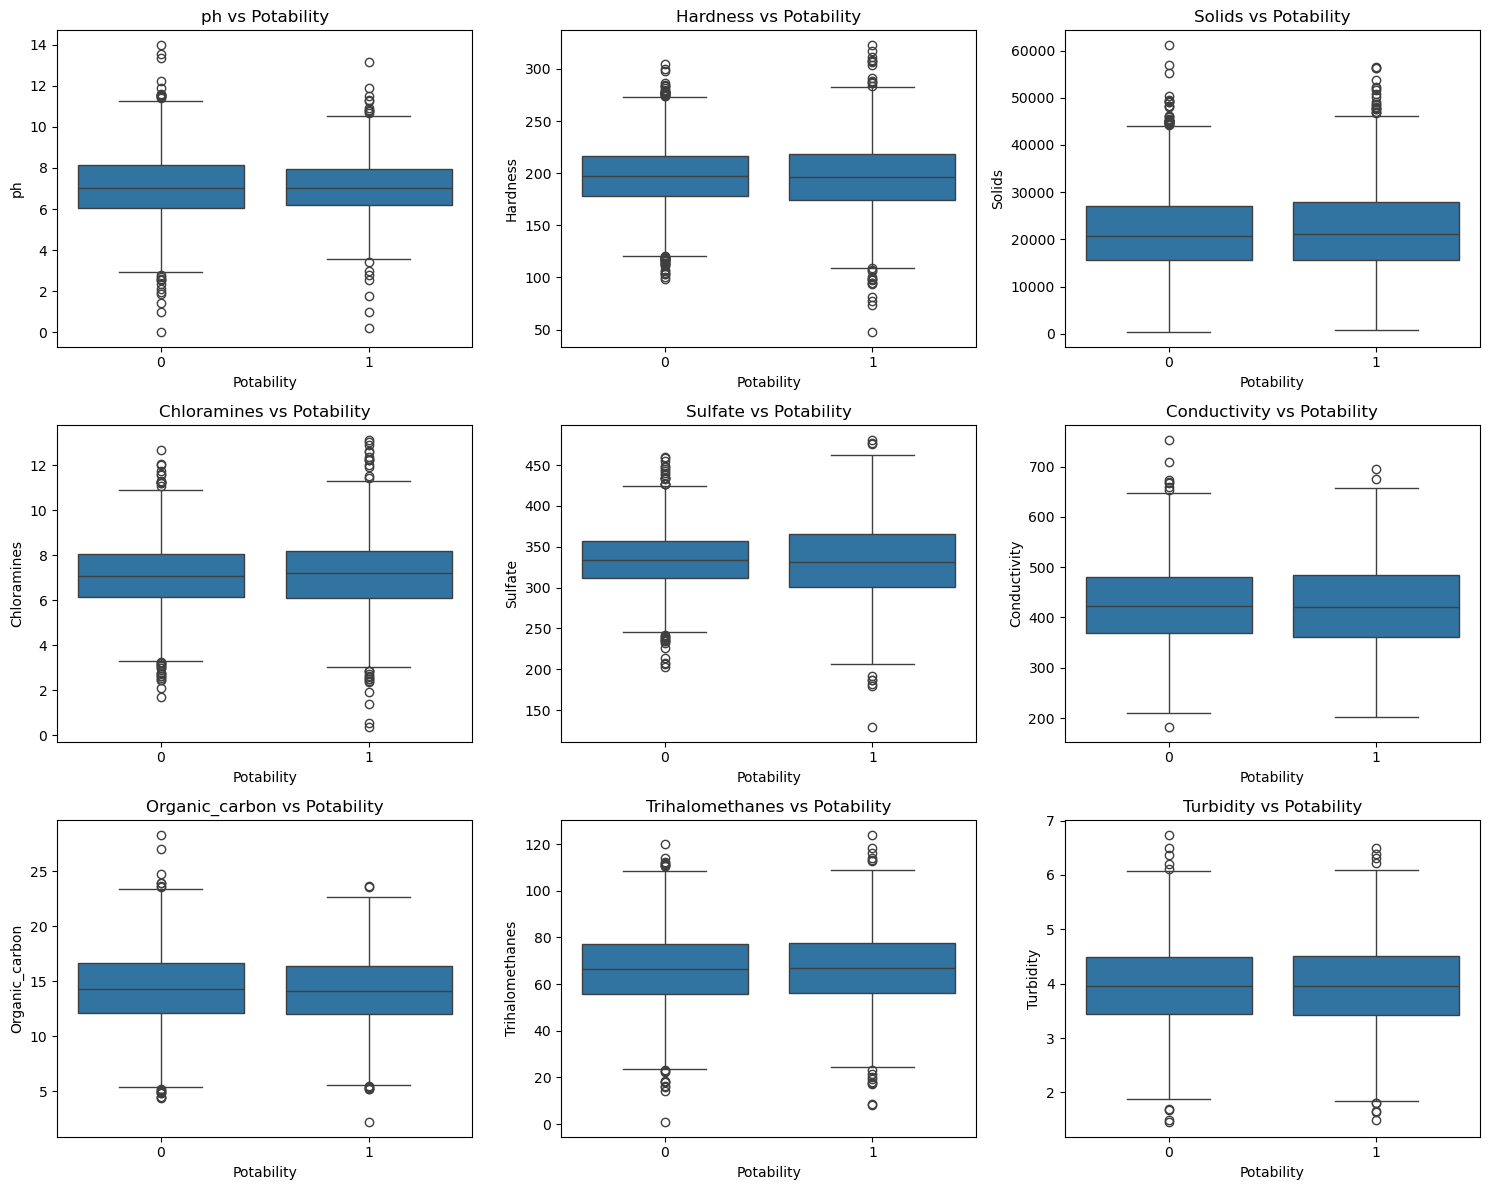

In [40]:
# Creo di una figura 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Listo le colonne delle feature (escludendo la colonna 'Potability')
feature_columns = df.select_dtypes(include=['float64', 'int64']).columns[:-1]

# Creo il boxplot per ogni feature
for i, column in enumerate(feature_columns):
    # DetePosizione corretta nel subplot
    row = i // 3  # Divisione intera per determinare la riga
    col = i % 3   # Resto per determinare la colonna
    
    # Boxplot per ogni feature
    sns.boxplot(x='Potability', y=column, data=df, ax=axes[row, col])
    
    # Titolo per ogni boxplot
    axes[row, col].set_title(f'{column} vs Potability')

# Aggiungo un layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()


In [41]:
def remove_outliers(X_df, y_df, outliers):
    # Uniamo tutte le righe contenenti outlier per ciascuna colonna
    outlier_indices = set()
    
    for column, outlier_data in outliers.items():
        outlier_indices.update(outlier_data.index)
    
    # Rimuoviamo le righe che contengono outlier da X_train e y_train
    X_cleaned = X_df.drop(index=outlier_indices)
    y_cleaned = y_df.drop(index=outlier_indices)
    
    return X_cleaned, y_cleaned

# Rimuovo gli outliers dal training set X_train e y_train
X_train, y_train = remove_outliers(X_train, y_train, outliers)

<span style="color: red; font-size: 18px; font-weight: bold;">
C'è correlazione lineare tra le features?
</span>

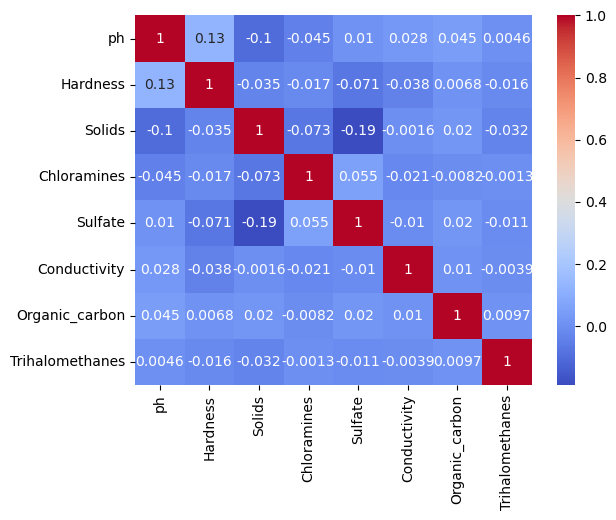

In [43]:
#Visualizzo la correlazione con una matrice di correlazione

# Calcolare la matrice di correlazione
corr_matrix = X_train[X_train.columns[:-1]].corr()

# Visualizzare la matrice di correlazione con una heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [44]:
#sns.pairplot(df, hue='Potability', diag_kind='kde', palette='deep')
#plt.show()

<div style="background-color: #fff8dc; padding: 10px;">
    
1. **Distribuzione delle feature**:
   - La diagonale dei grafici mostra distribuzioni univariate, con molte feature (pH, Chloramines, Sulfate, Turbidity) simmetriche e normali, mentre "Solids" è asimmetrica con valori elevati.
    
2. **Scatter plot tra coppie di feature**:
   - Non emergono relazioni forti tra le feature. I grafici suggeriscono una bassa correlazione tra le variabili, come confermato dalla matrice di correlazione.

3. **Differenza tra le classi (potabilità)**:
   - Le due classi si sovrappongono in molte coppie di feature, senza separazione evidente. Ciò indica la necessità di modelli complessi per catturare relazioni intricate.

4. **Osservazioni su singole feature**:
   - "Solids" mostra alta variabilità e potrebbe essere utile con altre feature. "Turbidity" ha una distribuzione distinta ma non si distingue per la potabilità. "Trialometani" e "Conductivity" sono più uniformi e sovrapposte tra le classi.

5. **Implicazioni per il progetto ML**:
   - È necessaria una gestione avanzata del preprocessing e del modello, inclusi:
     - **Feature scaling** per gestire scale diverse (ad esempio "Solids").
     - **Selezione delle feature** per eliminare quelle irrilevanti.
     - **Modelli non lineari** come Random Forest o XGBoost per relazioni complesse.
  </div>

In [46]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train

ph    Hardness        Solids  Chloramines     Sulfate  \
2117   8.575939  215.136721  15778.729396     7.532773  316.959490   
1971   6.333640  185.436340  18506.288609     6.572682  356.971033   
69     7.261551  179.889788  24964.777703     5.837086  349.269271   
1595   6.917858  200.705505  27651.609099     6.529774  321.696455   
1166   5.716251  184.229295  19393.469862     5.299164  290.276455   
...         ...         ...           ...          ...         ...   
917    7.592672  177.080839  14912.225506     6.041144  349.240614   
101    7.348845  223.264940  11519.046527     8.889559         NaN   
1734   3.928556  191.665998  17328.161457     7.692417  306.479558   
768   10.538098  200.139829  13867.244196     7.365015  409.446730   
2242   6.645657  170.269715  23432.109730     7.066565         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2117    359.830073       14.944675        79.463992   4.002129           0  
1971    366.813108       16.439629        76.764385   3.982002           1  
69      501.182781       17.287713        50.993006   3.636364           0  
1595    453.637510       11.283387        91.942181   5.544167           1  
1166    502.993687       19.643896        68.236370   3.433135           1  
...            ...             ...              ...        ...         ...  
917     355.284442       17.161966        42.115257   3.341427           0  
101     494.158434       18.145374        73.715522   4.880875           0  
1734    406.085614        9.578602        45.480738   5.060836           0  
768     340.808823       17.073123        72.730639   3.823093           1  
2242    513.364946       20.264678        78.900888   4.170658           0  

[2222 rows x 10 columns]

<span style="color: red; font-size: 18px; font-weight: bold;">
Le features hanno tutte la stessa rilevanza?
</span>

In [48]:
from scipy.stats import ttest_ind
df_train = pd.concat([X_train, y_train], axis=1)
# T-Test per ciascuna feature rispetto alla potabilità
for feature in df_train.columns[:-1]:
    group_0 = df_train[df_train['Potability'] == 0][feature].dropna()
    group_1 = df_train[df_train['Potability'] == 1][feature].dropna()

    f_stat, p_value = ttest_ind(group_0, group_1)
    print(f"\n{feature}\nT-statistic: {f_stat}, p-value: {p_value}")


ph
T-statistic: -0.8649095080420145, p-value: 0.38719880504168414

Hardness
T-statistic: -0.17429691867810174, p-value: 0.8616480132183336

Solids
T-statistic: -0.5971193906159277, p-value: 0.550488565638081

Chloramines
T-statistic: -0.6785634802421248, p-value: 0.4974852154740276

Sulfate
T-statistic: -0.5631966246322093, p-value: 0.5733758889892636

Conductivity
T-statistic: -0.07389079472895985, p-value: 0.9411039374682062

Organic_carbon
T-statistic: 1.000529489370298, p-value: 0.3171633750811091

Trihalomethanes
T-statistic: -0.7854206492972818, p-value: 0.43229528561418396

Turbidity
T-statistic: -0.37756605932947707, p-value: 0.7057890744817166


<div style="background-color: #fff8dc; padding: 10px;">
    
**T-statistic:** Misura la differenza tra i gruppi in termini di deviazioni standard.  
**P-value:** Il p-value indica la probabilità che la differenza osservata tra i gruppi sia dovuta al caso. Se il p-value è inferiore a una soglia (0.05), puoi rifiutare l'ipotesi nulla e concludere che c'è una differenza significativa tra i gruppi.
  </div>

In [50]:
import itertools
from statsmodels.multivariate.manova import MANOVA

# Tutte le possibili combinazioni di lunghezza variabile (da 2 a len(array))
combinations_list = []
for r in range(2, len(X_train.columns) + 1):
    combinations_list.extend(itertools.combinations(X_train.columns, r))

# Converte ciascuna combinazione in una lista (opzionale, poiché `combinations` restituisce tuple)
combinations_list = [list(comb) for comb in combinations_list]

# Lista per memorizzare le combinazioni e i p-value
results = []

# Itera su ogni combinazione
for combination in combinations_list:
    formula = ''
    for i, feature in enumerate(combination):
        # Aggiungi "+" solo se non è l'ultima feature
        formula += f' {feature}'
        if i < len(combination) - 1:
            formula += ' +'
    
    # Aggiungo la parte della variabile dipendente
    formula += ' ~ Potability'

    # Eseguo la MANOVA
    maov = MANOVA.from_formula(formula, data=df_train)
    result = maov.mv_test()
    
    # Estraggo i p-value per ogni statistica di separazione
    p_value = result['Potability']['stat'].loc['Wilks\' lambda', 'Pr > F']  # Wilks' Lambda p-value
    
    if p_value < 0.05:  # Filtra solo combinazioni con p-value < 0.05
        # Estraggo le statistiche di separazione
        wilks_lambda = result['Potability']['stat'].loc['Wilks\' lambda', 'Value']
        pillai_trace = result['Potability']['stat'].loc['Pillai\'s trace', 'Value']
        hotelling_trace = result['Potability']['stat'].loc['Hotelling-Lawley trace', 'Value']
        roy_root = result['Potability']['stat'].loc['Roy\'s greatest root', 'Value']
        
        # Salvo la combinazione, il p-value e le statistiche di separazione
        results.append((combination, p_value, wilks_lambda, pillai_trace, hotelling_trace, roy_root))

# Ordino i risultati in base al p-value (dal più basso al più alto)
results_sorted = sorted(results, key=lambda x: x[1])

# Stampo solo le combinazioni con p-value < 0.05 e le statistiche di separazione
print("Combinazioni significative con p-value < 0.05 e statistiche di separazione:")
for combination, p_value, wilks_lambda, pillai_trace, hotelling_trace, roy_root in results_sorted:
    print(f"Combinazione: {combination} \n- P-value: {p_value:.4f} \n- Wilks' Lambda: {wilks_lambda:.4f} \n- Pillai's Trace: {pillai_trace:.4f} \n- Hotelling-Lawley Trace: {hotelling_trace:.4f} \n- Roy's Largest Root: {roy_root:.4f}")


Combinazioni significative con p-value < 0.05 e statistiche di separazione:
Combinazione: ['ph', 'Hardness', 'Solids', 'Sulfate'] 
- P-value: 0.0380 
- Wilks' Lambda: 0.9929 
- Pillai's Trace: 0.0071 
- Hotelling-Lawley Trace: 0.0072 
- Roy's Largest Root: 0.0072
Combinazione: ['ph', 'Solids', 'Sulfate'] 
- P-value: 0.0462 
- Wilks' Lambda: 0.9944 
- Pillai's Trace: 0.0056 
- Hotelling-Lawley Trace: 0.0056 
- Roy's Largest Root: 0.0056


<div style="background-color: #fff8dc; padding: 10px;">
    
Il **MANOVA** (Multivariate Analysis of Variance) è un'estensione del test **ANOVA** (Analysis of Variance) che permette di analizzare simultaneamente più variabili dipendenti. A differenza dell'ANOVA, che esamina una sola variabile dipendente, il MANOVA considera l'interazione tra più variabili dipendenti in relazione a una o più variabili indipendenti, per verificare se ci sono differenze significative tra i gruppi per combinazioni di variabili.  
  
I risultati:

-Combinazione: **['ph', 'Solids', 'Sulfate']** - P-value: 0.046: Il valore di p è inferiore a 0.05, quindi possiamo rifiutare l'ipotesi nulla e concludere che ci sono differenze significative tra i gruppi per la combinazione di queste variabili.

-Combinazione: **['ph', 'Hardness', 'Solids', 'Sulfate']** - P-value: 0.038: Il valore di p è inferiore a 0.05 e inferiore a quello di ['ph', 'Solids', 'Sulfate'] quindi possiamo rifiutare l'ipotesi nulla e concludere che ci sono differenze significative tra i gruppi per la combinazione di queste variabili.

-Combinazione: **['ph', 'Hardness', 'Solids', 'Sulfate' + 1 feature]** - Aumentare il numero di feature non aiuta la distinzione anzi la aumenta.
 
</div>

## 6. Gestione dati mancanti

<div style="background-color: #fff8dc; padding: 10px;">

**Dati mancanti**  
Quando ci troviamo di fronte a dati mancanti, la questione di come trattarli diventa un aspetto cruciale per la costruzione di un modello di machine learning robusto. La decisione se eliminare o imputare i dati mancanti dipende da diversi fattori, tra cui la quantità di dati mancanti, la distribuzione delle variabili, e l’impatto che la perdita di informazioni può avere sulla qualità del modello.  

**Eliminazione i dati mancanti** Questo approccio, seppur semplice e diretto, può portare a una riduzione significativa della dimensione del dataset, con il rischio di perdere informazioni preziose. Se i dati mancanti sono pochi, l'eliminazione potrebbe essere una scelta accettabile, ma in molti casi, soprattutto quando la percentuale di dati mancanti è più alta, questa soluzione rischia di distorcere il dataset e di ridurre la variabilità che ci permette di costruire un modello accurato. In altre parole, eliminare i dati potrebbe comportare la perdita di un'informazione rilevante e ridurre la capacità del modello di generalizzare correttamente.  

**Imputazione dei dati mancanti**. Questo approccio appare come una soluzione più vantaggiosa, perché consente di mantenere intatto il dataset, senza ridurre la quantità di dati su cui allenare il modello. Tuttavia, l’imputazione porta con sé un altro insieme di considerazioni: come imputare i valori mancanti senza introdurre bias o influenze non desiderate. Ad esempio, se utilizziamo una semplice imputazione con la media o la mediana, rischiamo di ridurre la variabilità naturale dei dati, immettendo valori che non rispecchiano correttamente la distribuzione delle variabili. D’altra parte, l’imputazione tramite un modello di machine learning potrebbe essere più sofisticata, ma occorre stare molto attenti a evitare il data leakage, che può compromettere la capacità del modello di generalizzare sui dati di test.  

**Strategie per Evitare il Data Leakage nell’Imputazione**
1. **Separazione tra Training e Test Set**: È fondamentale separare i dati di addestramento e test durante l’imputazione. Ciò significa che l’imputazione deve avvenire solo sui dati di training, e i dati di test non devono influenzare né essere influenzati dal processo di imputazione. Il modello di imputazione deve essere addestrato esclusivamente sui dati di training e poi applicato ai dati di test, senza che questi ultimi vengano utilizzati per allenare il modello.  

2. **Evitare l’uso della Variabile Target**: Durante il processo di imputazione, la variabile target non deve mai essere utilizzata come feature. Questo è cruciale per evitare che il modello impari correlazioni tra la target e i dati di input che non saranno disponibili al momento della predizione.  

3. **Imputazione per Colonna, Non per Riga**: Imputare i valori per colonna piuttosto che per riga riduce la possibilità che il modello sfrutti correlazioni inappropriate tra variabili diverse nella stessa osservazione. Ad esempio, imputare un valore mancante di "ph" guardando solo le informazioni disponibili per quella colonna aiuta a evitare che il modello impari correlazioni errate tra righe.  

4.**Cross-Validation Durante l’Imputazione**: Se si utilizza un modello di machine learning per imputare i valori mancanti, bisogna assicurarsi di eseguire una cross-validation, che permetta di validare il modello su più fold. Questo aiuta a ridurre l’effetto di overfitting e assicura che l’imputazione sia robusta e generalizzabile.  

*Nel nostro **caso specifico**, dato che dalla valutazione dell'importanza delle features è emerso che proprio le variabili **ph** e **sulfate** sembrano avere un ruolo  nella distinzione tra acque potabili e non, si è optato per l'**imputazione** piuttosto che la rimozione dei dati.*  

**KNN (K-Nearest Neighbors)**  Il KNN Imputer è un metodo che sfrutta la somiglianza tra le osservazioni per imputare i valori mancanti. Questo approccio è abbastanza robusto da non introdurre distorsioni significative, pur mantenendo una buona rappresentazione delle relazioni tra le variabili. Rispetto all’imputazione semplice (media o mediana), il KNN è in grado di mantenere una certa variabilità nelle variabili e, grazie alla sua natura, può catturare anche relazioni non lineari tra le feature, che possono rivelarsi particolarmente utili quando le variabili sono complesse o intercorrelate. 

</div>

In [54]:
columns = X_train.columns.tolist()
print(columns)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [55]:
# Funzione per trovare il miglior K per KNNImputer usando la cross-validation
def choose_best_k(X_train, y_train, k_values, cv=5, random_state=42):
    best_k = None
    best_score = -np.inf
    
    # Fissiamo il seme per la randomizzazione nella cross-validation
    np.random.seed(random_state)
    
    for k in k_values:
        imputer = KNNImputer(n_neighbors=k)
        # Eseguo la cross-validation sui dati di allenamento imputati
        scores = cross_val_score(RandomForestClassifier(random_state=random_state), imputer.fit_transform(X_train), y_train, cv=cv)
        mean_score = np.mean(scores)
        
        print(f"Score per K={k}: {mean_score}")
        
        if mean_score > best_score:
            best_score = mean_score
            best_k = k
            
    return best_k

# Lista di valori di K da testare
k_values = [2, 3, 4, 5, 10, 15]

# Trovo il miglior K
best_k = choose_best_k(X_train, y_train, k_values)
print(f"Il miglior valore di K è: {best_k}")

# Imposta l'imputer con il miglior K
imputer = KNNImputer(n_neighbors=best_k)

# Imputa i dati di training con il miglior K
X_train = imputer.fit_transform(X_train)

# Imputa i dati di test usando lo stesso KNNImputer (allenato su X_train)
X_test = imputer.transform(X_test)


Score per K=2: 0.645349731754226
Score per K=3: 0.658853122785707
Score per K=4: 0.6471586192934508
Score per K=5: 0.6511954651280495
Score per K=10: 0.6543607652596417
Score per K=15: 0.6570492964874988
Il miglior valore di K è: 3


In [56]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

## 7. Scelta delle metriche

<div style="background-color: #fff8dc; padding: 10px;">
    
Quando si valuta un modello di classificazione binaria, in particolare in scenari in cui le conseguenze degli errori sono asimmetriche (come potrebbe essere nel caso della classificazione dell'acqua potabile), è importante concentrarsi su metriche che riflettano adeguatamente le priorità del problema.

La **precisione** (o **precisone**) fornisce informazioni su quanto il modello sia accurato quando predice che l'acqua è non potabile, ovvero quanti falsi positivi vengono generati. La formula della precisione è:

Precision = TP / (TP + FP)


dove:
- **TP** (True Positives) è il numero di veri positivi, ossia i casi in cui l'acqua non potabile è correttamente classificata come non potabile.
- **FP** (False Positives) è il numero di falsi positivi, ossia i casi in cui l'acqua potabile è erroneamente classificata come non potabile.

In contesti dove è più grave classificare erroneamente l'acqua potabile come non potabile, questa metrica aiuta a monitorare la frequenza con cui ciò accade.

Tuttavia, poiché l'obiettivo principale potrebbe essere evitare che l'acqua non potabile venga classificata come potabile (falsi negativi), il **recall** (o **sensibilità**) diventa la metrica di maggiore interesse. Il recall indica quanta acqua non potabile è stata correttamente identificata dal modello, e un valore elevato di recall riduce il rischio di falsi negativi, che sono particolarmente critici in questo caso. La formula del recall è:

Recall = TP/ (TP + FN)


dove:
- **TP** (True Positives) è il numero di veri positivi.
- **FN** (False Negatives) è il numero di falsi negativi, ossia i casi in cui l'acqua non potabile è erroneamente classificata come potabile.

L'**F1-score** risulta utile quando si desidera un bilanciamento tra precisione e recall, poiché combina entrambe le metriche in un unico valore. L'F1-score è particolarmente utile quando è necessario evitare di focalizzarsi eccessivamente su un solo tipo di errore. La formula dell'F1-score è:


F1 = 2 * (Precision * Recall) / (Precision + Recall)


Infine, la **matrice di confusione** è sempre utile per avere una visione completa degli errori commessi dal modello, mostrando quanti falsi positivi e falsi negativi si verificano. La matrice di confusione contiene i seguenti valori:
- **True Positives (TP)**: Casi in cui il modello ha correttamente identificato l'acqua non potabile.
- **True Negatives (TN)**: Casi in cui il modello ha correttamente identificato l'acqua potabile.
- **False Positives (FP)**: Casi in cui il modello ha erroneamente identificato l'acqua potabile come non potabile.
- **False Negatives (FN)**: Casi in cui il modello ha erroneamente identificato l'acqua non potabile come potabile.

Tuttavia, per la valutazione della bontà del modello nella consegna del progetto, verrà utilizzata **l’accuracy**, una metrica semplice e spesso usata. L'**accuracy** è la proporzione di previsioni corrette rispetto al numero totale di esempi. La formula dell'accuracy è:

Accuracy = (TP + TN) / (TP + TN + FP + FN)


dove:
- **TP** (True Positives) sono i veri positivi.
- **TN** (True Negatives) sono i veri negativi.
- **FP** (False Positives) sono i falsi positivi.
- **FN** (False Negatives) sono i falsi negativi.

Nel contesto del progetto, per richiesta della consegna, sarà utilizzata per fornire una valutazione generale del modello.
</div>

## 8. Addestramento dei  modelli e predizioni

In [60]:
# Normalizzazione dei dati
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [62]:
# 1) Utilizzare tutte le feature disponibili
# 2) Selezionare le feature che sono risultate più rilevanti con il MANOVA-test

# Creare il set di dati per entrambe le strade
X_train_all = X_train  # Tutte le feature
X_train_selected = X_train[['ph', 'Hardness', 'Solids', 'Sulfate']]  # Solo le feature selezionate
X_test_all = X_test  # Tutte le feature
X_test_selected = X_test[['ph', 'Hardness', 'Solids', 'Sulfate']]  # Solo le feature selezionate

# Funzione per eseguire lo Spot Check
def spot_check(models, X_train, y_train, kfolds=10):
    kf = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=42)
    results = {}
    for name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        results[name] = scores.mean()
    return results

# Modelli da usare
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-nearest Neighbors': KNeighborsClassifier()
}

# Eseguiamo lo Spot Check per la strada 1 (tutte le feature)
print("Spot check con tutte le feature:")
results_all_features = spot_check(models, X_train_all, y_train)
print(results_all_features)

# Eseguiamo lo Spot Check per la strada 2 (feature selezionate)
print("Spot check con feature selezionate:")
results_selected_features = spot_check(models, X_train_selected, y_train)
print(results_selected_features)

Spot check con tutte le feature:
{'Logistic Regression': 0.6165636488506443, 'Random Forest': 0.6575162606552741, 'K-nearest Neighbors': 0.6291803013776108}
Spot check con feature selezionate:
{'Logistic Regression': 0.6165636488506443, 'Random Forest': 0.6620328849028401, 'K-nearest Neighbors': 0.6372702298711268}


### STRADA 1 -METTERE RANDOM SEEDSSSSSSSSSSSSSSSSSSSSSSSSSSSS

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'distance'}


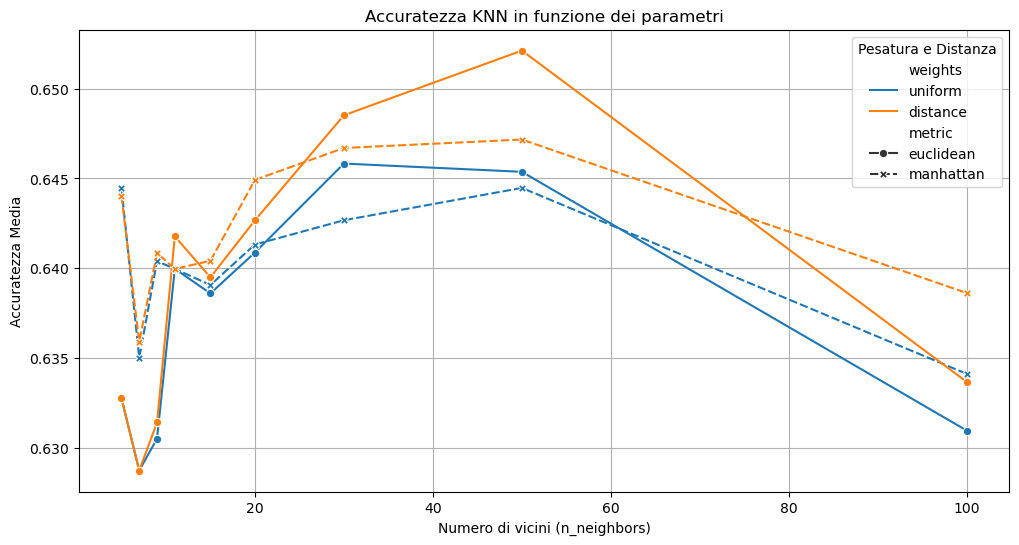

In [74]:
## STRADA 1

# 1) Tuning degli iperparametri con GridSearchCV per KNN
param_grid_knn = {
    'n_neighbors': [5, 7, 9, 11, 15, 20, 30, 50, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')
grid_search_knn.fit(X_train_all, y_train)  # Uso il training set completo
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")



# 2) Visualizzazione dei risultati per KNN
results_knn = grid_search_knn.cv_results_
df_knn = pd.DataFrame({
    'n_neighbors': results_knn['param_n_neighbors'],
    'weights': results_knn['param_weights'],
    'metric': results_knn['param_metric'],
    'mean_test_score': results_knn['mean_test_score']
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_knn, x='n_neighbors', y='mean_test_score', hue='weights', style='metric', markers=True)
plt.title("Accuratezza KNN in funzione dei parametri")
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("Accuratezza Media")
plt.legend(title='Pesatura e Distanza')
plt.grid(True)
plt.show()





Best parameters for Random Forest: {'n_estimators': 2000, 'min_samples_split': 5, 'max_depth': 20}


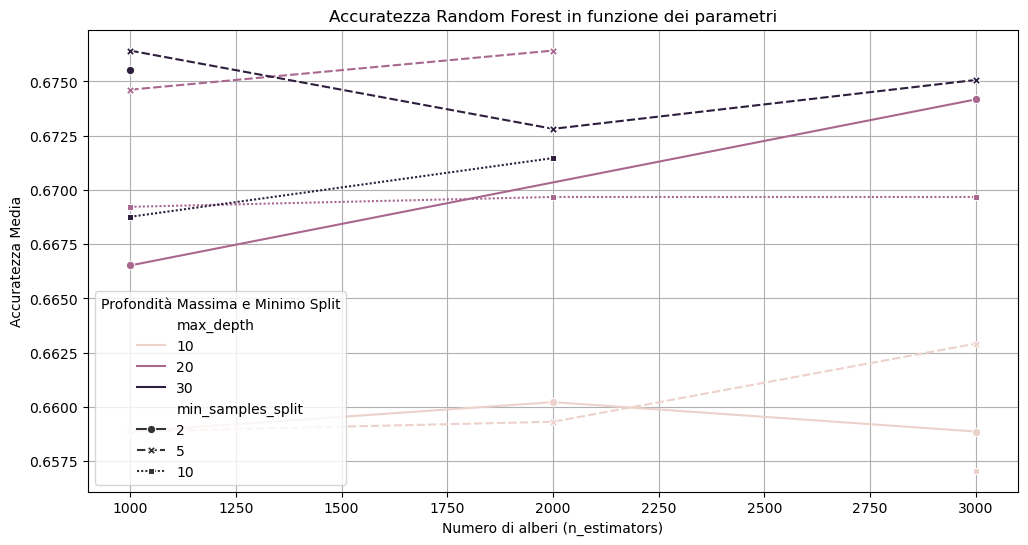

In [89]:
# Parametri per RandomizedSearch (rispetto a GridSearch è più veloce)
param_dist_rf = {
    'n_estimators': [1000, 2000, 3000],  # Numero di alberi limitato
    'max_depth': [10, 20, 30],  # Limitiamo la profondità
    'min_samples_split': [2, 5, 10],  # Minimo numero di campioni per fare uno split
}

# StratifiedKFold per cross-validation con shuffle
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Eseguo RandomizedSearch perche con grid search il mio computer ci mette parecchio tempo
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=20, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42
)
random_search_rf.fit(X_train_all, y_train)

# Stampo dei migliori parametri
print(f"Best parameters for Random Forest: {random_search_rf.best_params_}")

# Visualizzazione dei risultati
results_rf = random_search_rf.cv_results_
df_rf = pd.DataFrame({
    'n_estimators': results_rf['param_n_estimators'],
    'max_depth': results_rf['param_max_depth'],
    'min_samples_split': results_rf['param_min_samples_split'],
    'mean_test_score': results_rf['mean_test_score']
})

# Creazione grafico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rf, x='n_estimators', y='mean_test_score', hue='max_depth', style='min_samples_split', markers=True)
plt.title("Accuratezza Random Forest in funzione dei parametri")
plt.xlabel("Numero di alberi (n_estimators)")
plt.ylabel("Accuratezza Media")
plt.legend(title='Profondità Massima e Minimo Split')
plt.grid(True)
plt.show()


In [90]:
# 5) Valutazione dei due modelli migliori sul test set

# KNN
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_all)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN on Test Set: {knn_accuracy}")

# Random Forest
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_all)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest on Test Set: {rf_accuracy}")

# 6) Confronto finale delle prestazioni
if knn_accuracy > rf_accuracy:
    print("Il modello migliore è KNN")
else:
    print("Il modello migliore è Random Forest")


Accuracy of KNN on Test Set: 0.6275946275946276
Accuracy of Random Forest on Test Set: 0.6605616605616605
Il modello migliore è Random Forest


### STRADA 2

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'uniform'}


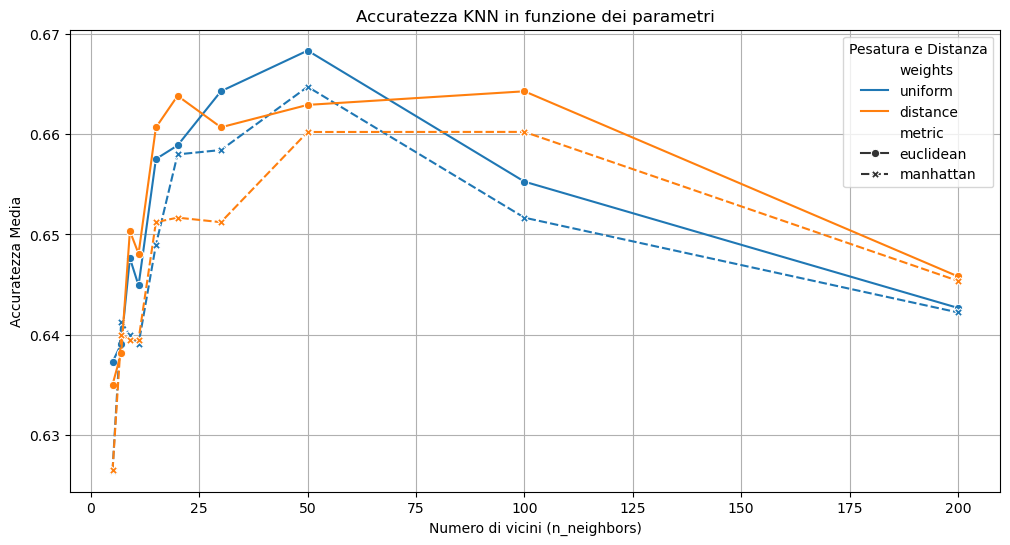

In [99]:
## STRADA 2

# 1) Tuning degli iperparametri con GridSearchCV per KNN
param_grid_knn = {
    'n_neighbors': [5, 7, 9, 11, 15, 20, 30, 50, 100, 200],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')
grid_search_knn.fit(X_train_selected, y_train)  # Uso il training set completo
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")

# 2) Visualizzazione dei risultati per KNN
results_knn = grid_search_knn.cv_results_
df_knn = pd.DataFrame({
    'n_neighbors': results_knn['param_n_neighbors'],
    'weights': results_knn['param_weights'],
    'metric': results_knn['param_metric'],
    'mean_test_score': results_knn['mean_test_score']
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_knn, x='n_neighbors', y='mean_test_score', hue='weights', style='metric', markers=True)
plt.title("Accuratezza KNN in funzione dei parametri")
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("Accuratezza Media")
plt.legend(title='Pesatura e Distanza')
plt.grid(True)
plt.show()

Best parameters for Random Forest: {'n_estimators': 2000, 'min_samples_split': 5, 'max_depth': 10}


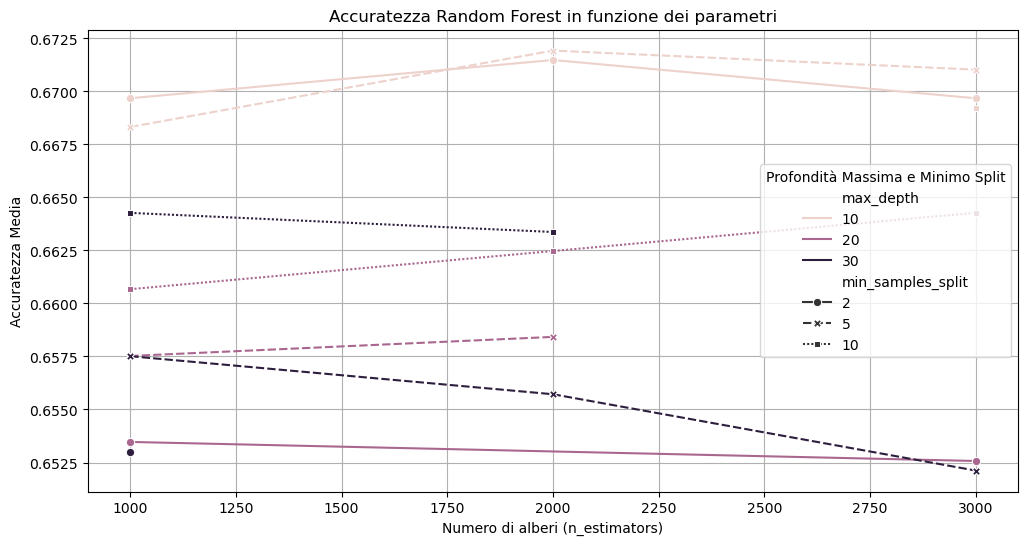

In [101]:
# 3) Tuning degli iperparametri con GridSearchCV per Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 30, 50, 100],
    'min_samples_split': [2, 5, 10]
}


# StratifiedKFold per cross-validation con shuffle
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Eseguo RandomizedSearch perche con grid search il mio computer ci mette parecchio tempo
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=20, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42
)

random_search_rf.fit(X_train_selected, y_train)  # Uso il training set completo
print(f"Best parameters for Random Forest: {random_search_rf.best_params_}")



# 4) Visualizzazione dei risultati per Random Forest
results_rf = random_search_rf.cv_results_
df_rf = pd.DataFrame({
    'n_estimators': results_rf['param_n_estimators'],
    'max_depth': results_rf['param_max_depth'],
    'min_samples_split': results_rf['param_min_samples_split'],
    'mean_test_score': results_rf['mean_test_score']
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rf, x='n_estimators', y='mean_test_score', hue='max_depth', style='min_samples_split', markers=True)
plt.title("Accuratezza Random Forest in funzione dei parametri")
plt.xlabel("Numero di alberi (n_estimators)")
plt.ylabel("Accuratezza Media")
plt.legend(title='Profondità Massima e Minimo Split')
plt.grid(True)
plt.show()

In [106]:
# 5) Valutazione dei due modelli migliori sul test set

# KNN
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_selected)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN on Test Set: {knn_accuracy}")

# Random Forest
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_selected)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest on Test Set: {rf_accuracy}")

# 6) Confronto finale delle prestazioni
if knn_accuracy > rf_accuracy:
    print("Il modello migliore è KNN")
else:
    print("Il modello migliore è Random Forest")

Accuracy of KNN on Test Set: 0.6691086691086691
Accuracy of Random Forest on Test Set: 0.652014652014652
Il modello migliore è KNN
